In [1]:
from lsst_efd_client import EfdClient
from lsst.ts import salobj

import asyncio
import numpy as np
import os, glob
import time
import ast

from astropy.io import fits
import matplotlib.pyplot as plt

from scipy import interpolate
from scipy import stats
from scipy.optimize import curve_fit

from astropy.time import Time, TimeDelta
import pandas as pd

from scipy.interpolate import RBFInterpolator

In [2]:
scan_files = glob.glob('/home/parfa30/DATA/ScanData/CIMACS_full_scan_*.fits')

In [3]:
scan_files = np.sort(scan_files)
print(scan_files)

['/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-06-15T16:15:51.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-06-16T17:52:42.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-06-16T21:08:52.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-06-17T15:39:14.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-06-20T16:17:05.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-07-06T23:11:28.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-07-07T17:39:37.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-07-07T23:10:33.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-07-12T20:59:25.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-07-13T20:26:00.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-07-14T23:36:00.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-07-20T00:16:19.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-07-21T21:32:56.fits'
 '/home/parfa30/DATA/ScanData/CIMACS_full_scan_2022

In [23]:
hdu = fits.open(scan_files[-6])
hdu.info()

Filename: /home/parfa30/DATA/ScanData/CIMACS_full_scan_2022-08-31T19:08:45.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  2             1 BinTableHDU     27   1296R x 9C   [D, D, D, D, D, D, D, D, D]   


In [24]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NAME    = 'CIMACS_full_scan'                                                    
SOURCE  = 'LED     '                                                            
WAVE    = '455nm   '                                                            
EXPTIME = '1       '                                                            
X_MIN   =               1000.0                                                  
X_MAX   =               1400.0                                                  
X_STEPS =                 35.0                                                  
Y_MIN   =                550.0                                                  
Y_MAX   =                950

In [14]:
elec_2 = hdu['2'].data

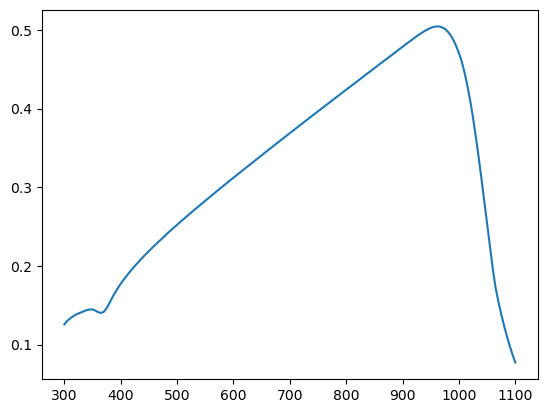

In [6]:
df = pd.read_csv('../hamamatsu_responsivity.csv')
plt.plot(df.wavelength, df.responsivity)

f = interpolate.interp1d(list(df.wavelength), list(df.responsivity))
def watts_per_mm2(amps,wl):
    area = 10**2 #10mm^2
    watts = amps/f(wl)
    watts_per_mm2 = watts/area
    return watts_per_mm2
def watts_per_cm2(amps,wl):
    print(f(wl))
    area = 1**2 #10mm^2
    watts = amps/f(wl)
    watts_per_mm2 = watts/area
    return watts_per_mm2

In [7]:
#starting pionts
x_offset = 1467.828
y_offset = 791.936

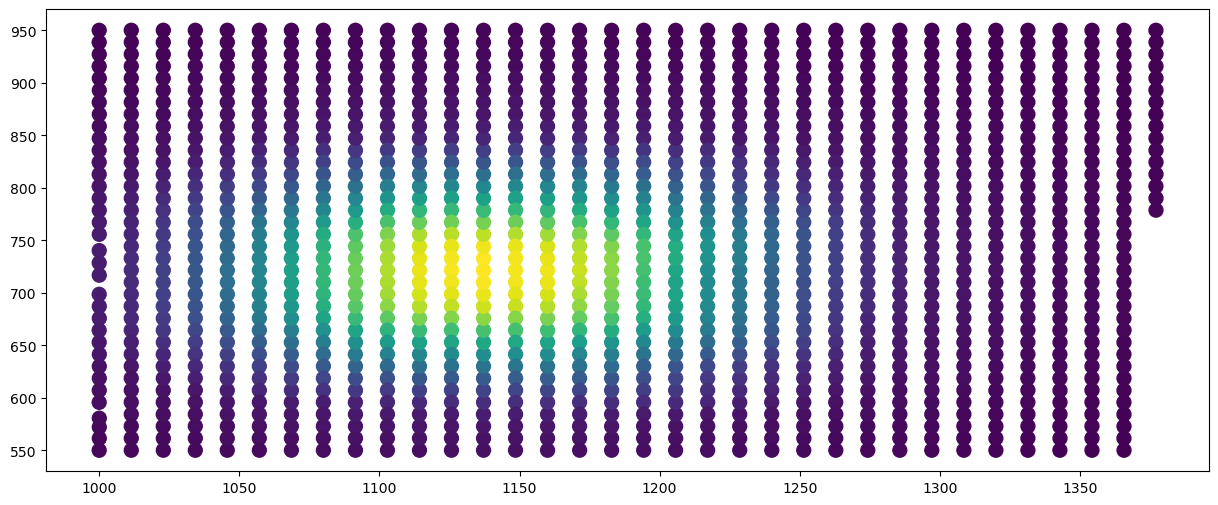

In [15]:
plt.figure(figsize=(15,6))
plt.scatter(elec_2.X,elec_2.Y, c=elec_2.MEAN*-1, s=100)

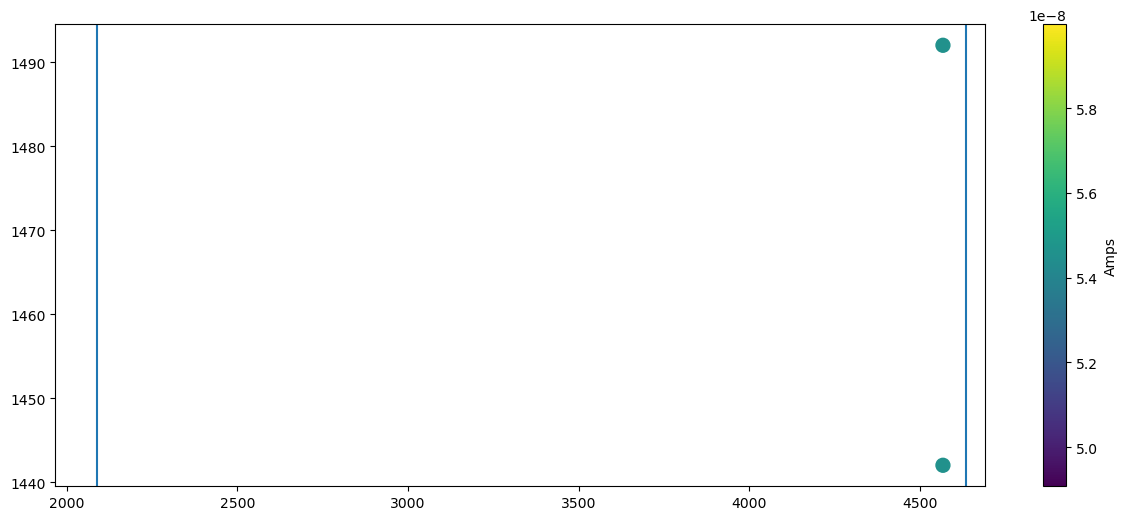

In [11]:
plt.figure(figsize=(15,6))
plt.scatter(elec_2.X+x_offset,elec_2.Y+y_offset, c=elec_2.MEAN*-1, s=100)
plt.colorbar(label='Amps')
plt.axvline(2090)
plt.axvline(4635)
# plt.xlim(1050, 1400)
#plt.ylim(1250, 150)
#plt.title(filen)

(1250.0, 150.0)

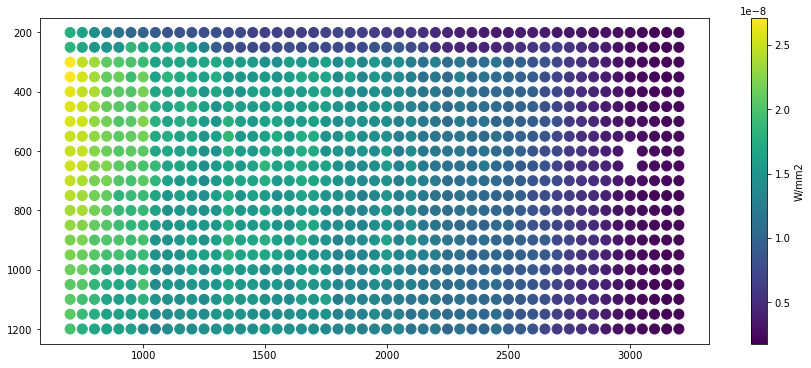

In [11]:
Z = elec_2.MEAN.flatten()*-1
ZZ = watts_per_mm2(Z, 455)
plt.figure(figsize=(15,6))
plt.scatter(elec_2.X,elec_2.Y, c=ZZ, s=100)
plt.colorbar(label='W/mm2')
# plt.xlim(1050, 1400)
plt.ylim(1250, 150)

Text(0, 0.5, 'W/mm2')

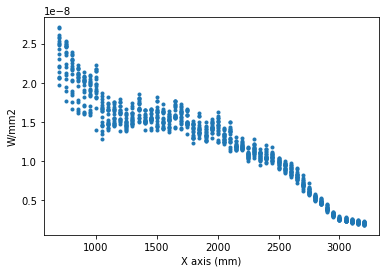

In [18]:
crop = np.where(elec_2.Y > 300)
plt.plot(elec_2[crop].X, ZZ[crop], '.')
plt.xlabel("X axis (mm)")
plt.ylabel('W/mm2')

Text(0, 0.5, 'W/mm2')

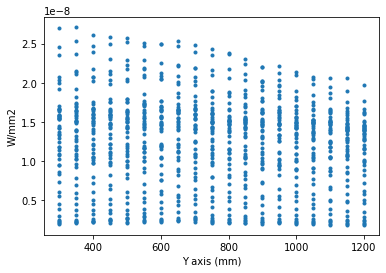

In [19]:
plt.plot(elec_2[crop].Y, ZZ[crop], '.')
plt.xlabel("Y axis (mm)")
plt.ylabel('W/mm2')

(1250.0, 150.0)

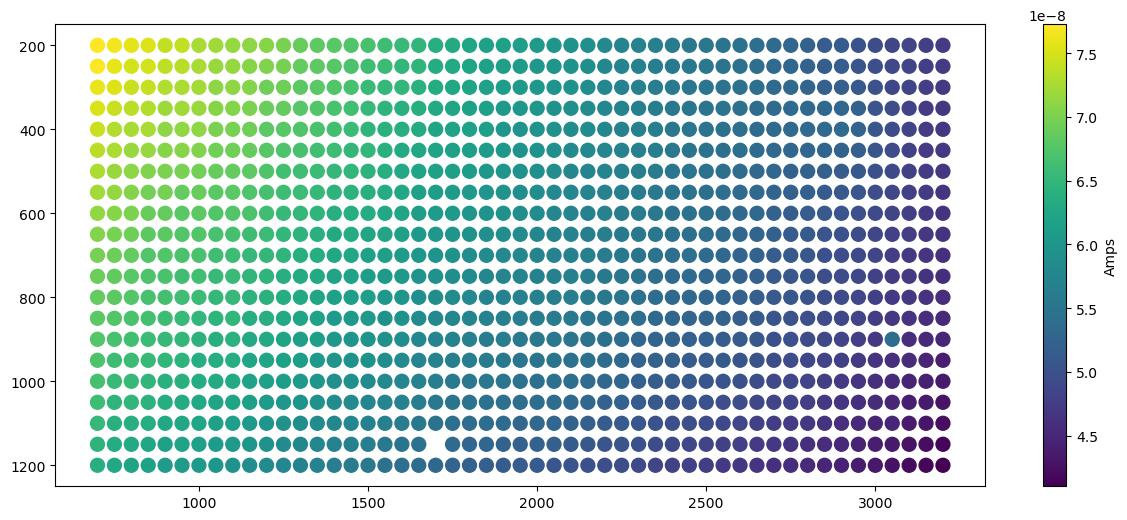

In [10]:
plt.figure(figsize=(15,6))
plt.scatter(elec_2.X,elec_2.Y, c=elec_2.MEAN*-1, s=100)
plt.colorbar(label='Amps')
#plt.axvline(2090)
#plt.axvline(4635)
# plt.xlim(1050, 1400)
plt.ylim(1250, 150)
#plt.title(filen)

(1250.0, 150.0)

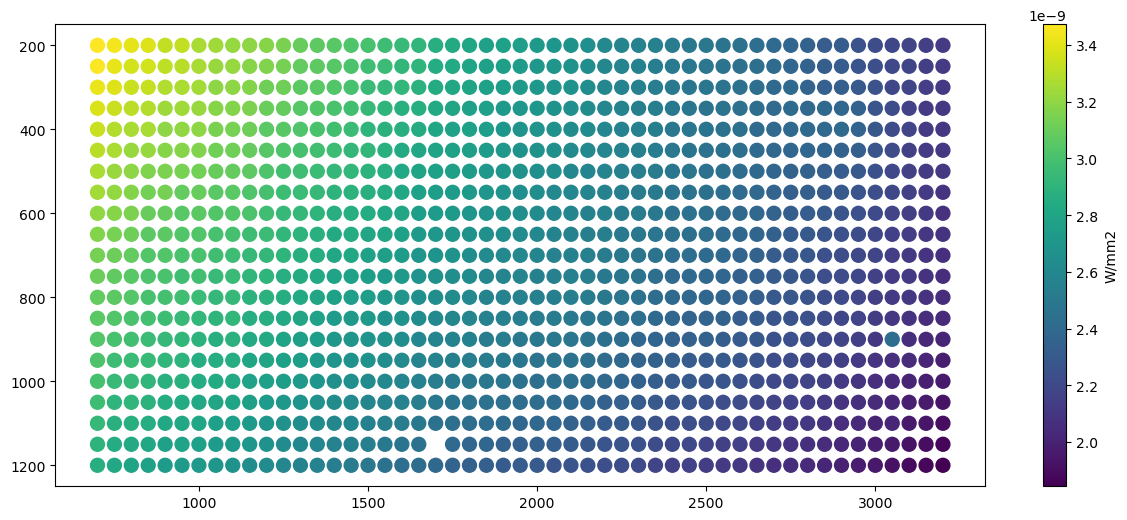

In [11]:
Z = elec_2.MEAN.flatten()*-1
ZZ = watts_per_mm2(Z, 455)
plt.figure(figsize=(15,6))
plt.scatter(elec_2.X,elec_2.Y, c=ZZ, s=100)
plt.colorbar(label='W/mm2')
# plt.xlim(1050, 1400)
plt.ylim(1250, 150)

Text(0, 0.5, 'W/mm2')

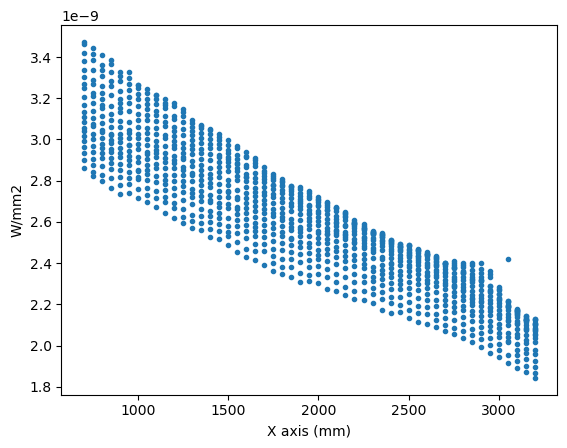

In [13]:

plt.plot(elec_2.X, ZZ, '.')
plt.xlabel("X axis (mm)")
plt.ylabel('W/mm2')

Text(0, 0.5, 'W/mm2')

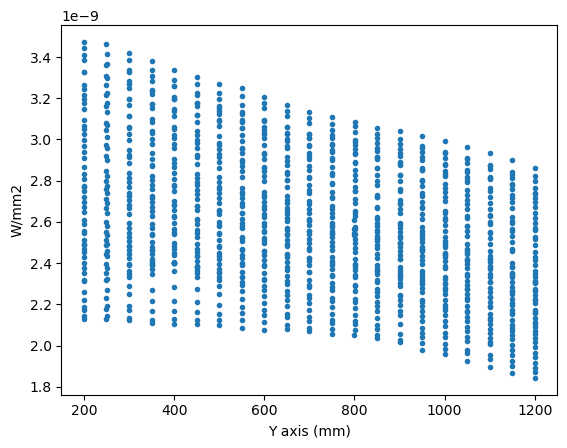

In [14]:

plt.plot(elec_2.Y, ZZ, '.')
plt.xlabel("Y axis (mm)")
plt.ylabel('W/mm2')